In [1]:
# Libraries
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
plt.style.use("seaborn-v0_8-whitegrid")
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 600

# Constants
random.seed(0)
tf = 60
dt = 0.001
N = round(tf/dt)
t = np.arange(0, tf, dt)

c0 = [0, 0]

In [2]:
def x_curve(t, k1, k2, k3, k4, xi):
    """
    Generates the analytical x curve for a given set of parameters.
    Args:
    t:  Time (array)
    k1: k1 constant (float)
    k2: k2 constant (float)
    k3: k3 constant (float)
    k4: k4 constant (float)
    xi: xi constant (float)
        
    Returns:
    x : X curve array
    """

    Ac = 1 # A
    eta = Ac
    
    B = k1 + k4
    C = k1*k4 + k2*k3
    Q = k4 - k2*xi
    
    x_raya = Q/C * Ac
    eig_1 = -(-B + np.sqrt(B**2 - 4*C))/2
    eig_2 = -(-B - np.sqrt(B**2 - 4*C))/2
    C1 = (eta - eig_2*x_raya)/(eig_2-eig_1)
    C2 = (eta - eig_1*x_raya)/(eig_2-eig_1)
    return C1*np.exp(-eig_1*t) - C2*np.exp(-eig_2*t) + x_raya

def y_curve(t, k1, k2, k3, k4, xi):
    """
    Generates the analytical y curve for a given set of parameters.
    Args:
    t:  Time (array)
    k1: k1 constant (float)
    k2: k2 constant (float)
    k3: k3 constant (float)
    k4: k4 constant (float)
    xi: xi constant (float)
        
    Returns:
    y : Y curve array
    """
    Ac = 1 # A
    eta = 0
    
    B = k1 + k4
    C = k1*k4 + k2*k3
    
    # a = -k1, b = k2, c = k3, d = -k4
    # P = (c-a*xi) -> P = k3 + k1*xi
    P = k3 + k1*xi
    
    y_raya = P/C * Ac
    eig_1 = -(-B + np.sqrt(B**2 - 4*C))/2
    eig_2 = -(-B - np.sqrt(B**2 - 4*C))/2
    
    C1 = (eta - eig_2*y_raya)/(eig_2-eig_1)
    C2 = (eta - eig_1*y_raya)/(eig_2-eig_1)
    return C1*np.exp(-eig_1*t) - C2*np.exp(-eig_2*t) + y_raya

In [3]:
k1, k2, k3, k4, xi, Ac = 1, 2, 0.05, 0.05, 0, 1
x = x_curve(t, k1, k2, k3, k4, xi)
y = y_curve(t, k1, k2, k3, k4, xi)

In [4]:
tspan = [0, tf]

def system(t, z, k1, k2, k3, k4, Ac, xi):
    """
    This function returns the ODE system.

    Args:
        t (parameter): time (optional)
        z (list): state variables
        k1 (float): k1 constant
        k2 (float): k2 constant
        k3 (float): k3 constant
        k4 (float): k4 constant
        Ac (float): Ac constant
        xi (float): xi constant
    
    Returns:
        list: ODE system
    """
    x, y = z
    return [- k1*x - k2*y + Ac, k3*x - k4*y + xi*Ac]

def simulator(k1, k2, k3, k4, Ac, xi):
    """Solves the ODE system using the SciPy solver.

    Args:
        k1 (float): k1 constant
        k2 (float): k2 constant
        k3 (float): k3 constant
        k4 (float): k4 constant
        Ac (float): Ac constant
        xi (float): xi constant

    Returns:
        The solution of the ODE system.
    """
    return solve_ivp(system, tspan, c0, args = (k1, k2, k3, k4, Ac, xi), t_eval = t) # Explicit step size

sol = simulator(k1, k2, k3, k4, Ac, xi)

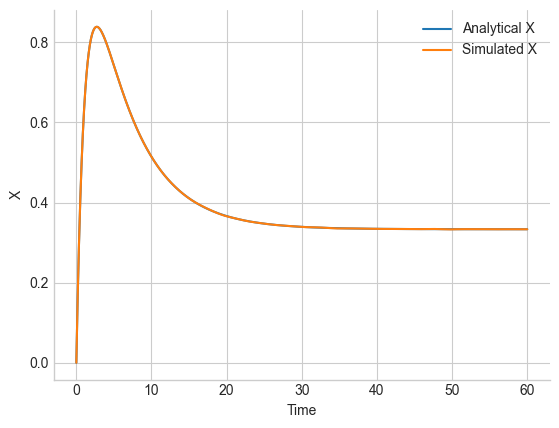

In [5]:
#plot x
plt.plot(t, x, label="Analytical X")
plt.plot(t, sol.y[0], label="Simulated X")
plt.xlabel("Time")
plt.ylabel("X")
plt.legend()

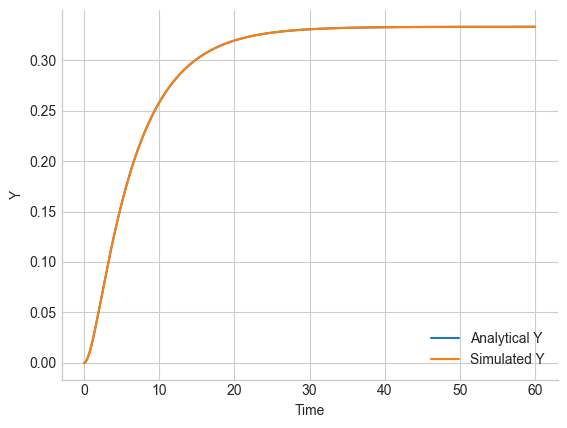

In [6]:
#plot y
plt.plot(t, y, label="Analytical Y")
plt.plot(t, sol.y[1], label="Simulated Y")
plt.xlabel("Time")
plt.ylabel("Y")
plt.legend()